[PIPELINE] Starting Training Pipeline...
[INFO] Loading dataset...
[INFO] Dataset Shape: (590540, 271)

[INFO] Starting Fold 1...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[382]	train's auc: 0.99994	valid's auc: 0.901437
[RESULT] Fold 1 AUC: 0.9014

[INFO] Starting Fold 2...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[223]	train's auc: 0.994567	valid's auc: 0.915521
[RESULT] Fold 2 AUC: 0.9155

[INFO] Starting Fold 3...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[339]	train's auc: 0.993531	valid's auc: 0.910691
[RESULT] Fold 3 AUC: 0.9107

[INFO] Starting Fold 4...
Training until validation scores don't improve for 100 rounds
[500]	train's auc: 0.993701	valid's auc: 0.925263
Early stopping, best iteration is:
[436]	train's auc: 0.991834	valid's auc: 0.92583
[RESULT] Fold 4 AUC: 0.9258

[INFO] Starting Fold 5...
Training until

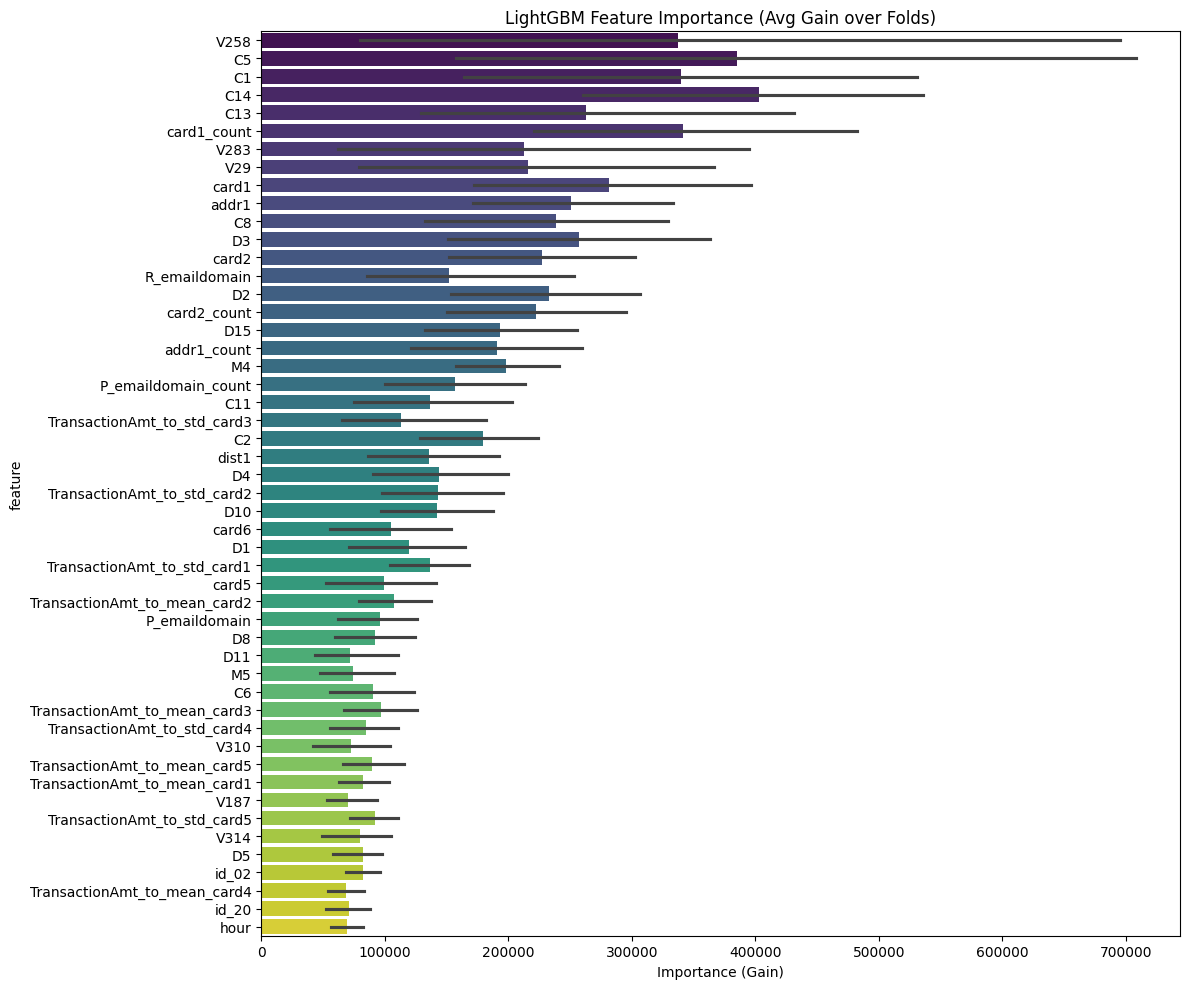

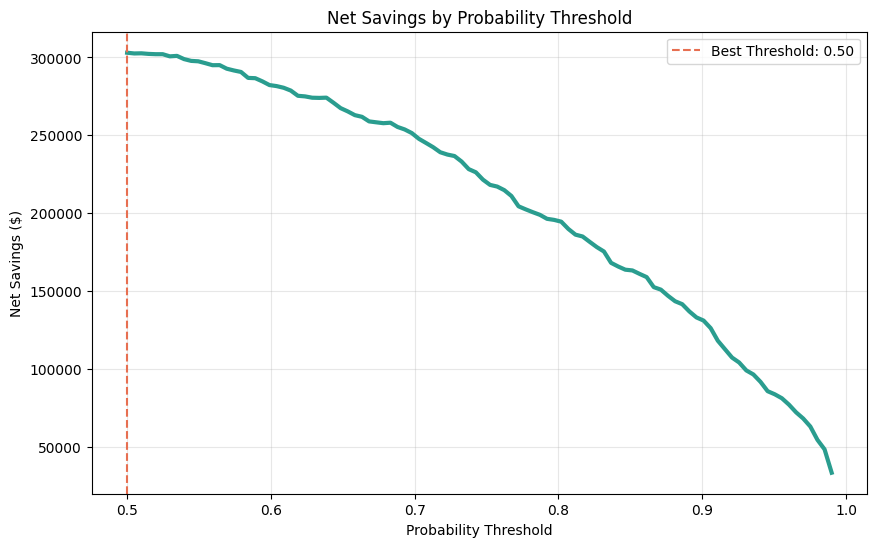

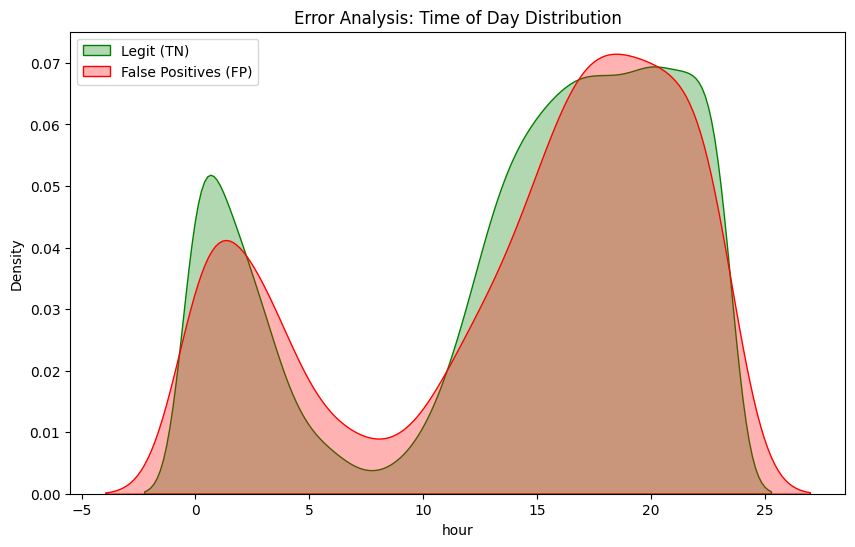

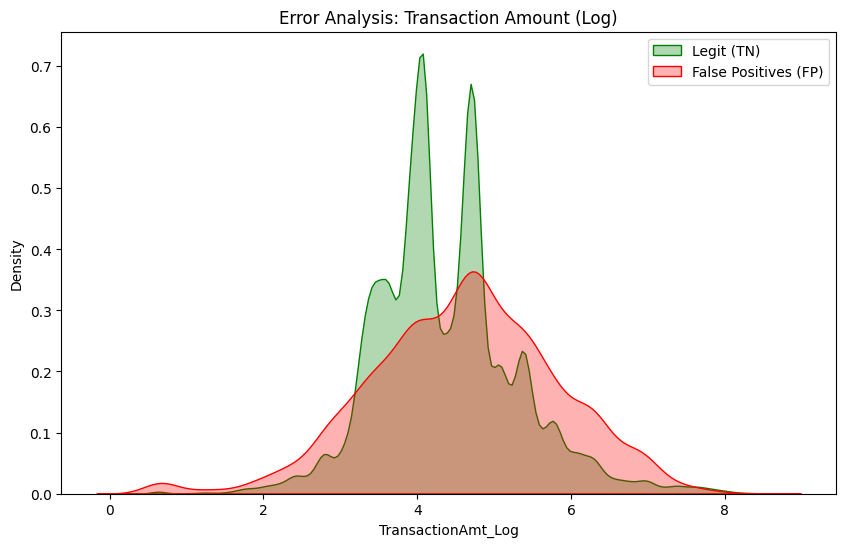

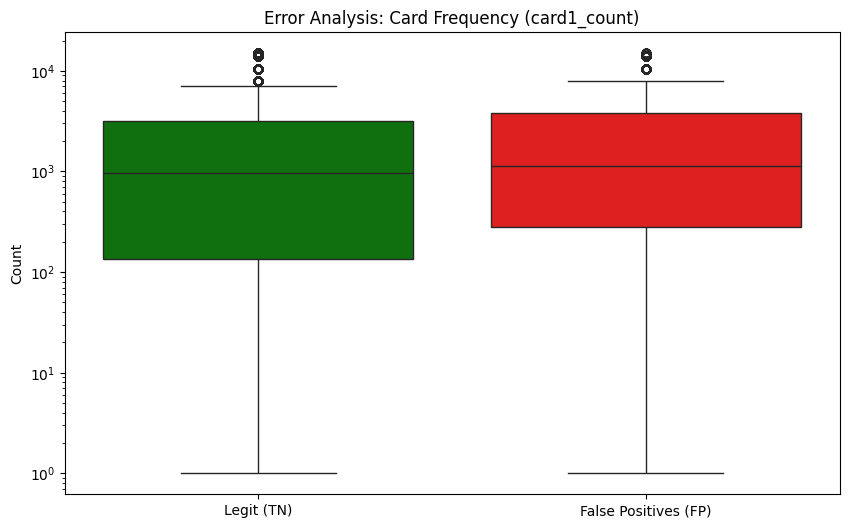

In [31]:
import importlib
from utils import train_lightgbm

# Reload to capture latest changes
importlib.reload(train_lightgbm)

if __name__ == "__main__":
    print("[PIPELINE] Starting Training Pipeline...")

    # 1. Train Model
    # Returns importance dataframe and validation data for analysis
    importance_df, finance_data = train_lightgbm.train_robust_model()

    # 2. Macro Analysis: Feature Importance
    # Helps understand what drives the model globally
    print("\n[PIPELINE] Step 2: Generating Feature Importance...")
    train_lightgbm.plot_feature_importance(importance_df)

    # 3. Business Analysis: Financial Threshold
    # Determines the optimal cut-off point for production
    if finance_data:
        print("\n[PIPELINE] Step 3: Calculating Financial Threshold...")
        best_threshold = train_lightgbm.optimize_financial_threshold(
            y_true=finance_data['y_true'],
            y_prob=finance_data['y_prob'],
            amounts=finance_data['amounts']
        )

        # 4. Micro Analysis: Error Patterns
        # Investigates why the model makes mistakes (False Positives)
        print("\n[PIPELINE] Step 4: Analyzing Error Patterns...")
        train_lightgbm.analyze_error_patterns(finance_data, threshold=best_threshold)

    print("\n[PIPELINE] Process Completed Successfully.")